# 2.1. Lineare Regression
## Imports

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

>## <ins>Table of contents</ins>
>* [**2.1.1. Grundlagen**](#Grundlagen)
    * [**Das lineare Modell**](#das_lineare_modell)
    * [**Das quadrasche Fehler L(D, f) bzw. R<sup>2</sup>-Wert**](#L)
>* [**2.1.2. Evaluation**](#Evaluation)
>* [**2.1.3. Nicht-lineare-Modelle**](#nl_modelle)
>* [**2.1.4. Über- und Unteranpassung**](#u_u_anpassung)
    * [**Die Verzerrung-Varianz-Dilemma** (engl. bias-variance tradeoff)](#v_v_dilemma)
>* [**2.1.5. Regularisierung**](#regularisierung)
>* [**2.1.6. Zusammenfassung**](#zusammenfassung)
>* [**2.1.6. Fragen**](#fragen)

## 2.1.1. Grundlagen <a name="Grundlagen"></a>
---
**Beispiel**

Stellen Sie sich vor, Sie wollen Ihrem oder Ihrer Liebsten einen Ring schenken und möchten, dass dies eine Überraschung wird. Weiterhin ergibt sich nicht die Möglichkeit den Umfang des Ringfingers der Person (heimlich) abzumessen, so dass Sie andere Wege finden müssen, um an diese Information zu kommen. Wie es der Zufall so will, verfügen Sie allerdings über Daten Ihrer besten Freunde, die den Umfang des Ringfingers mit der Körpergröße der
jeweiligen Person in Beziehung setzt. 
So lassen sich die Daten entsprechend als Datensatz Dring via:
```
Dring = {((153.3),47.1),((158.9),46.8),((160.8),49.3),((179.6),53.2),((156.6),47.7),
((165.1),49.0),((165.9),50.6),((156.7),47.1),((167.8),51.7),((160.8),47.8)}
```

repräsentieren.
Hierbei ist beispielsweise `((153.3),47.1)` ein Beispiel mit Datenpunkt `(153.3) ∈ R`,
wobei 153.3 die Ausprägung des Merkmals "Körpergröße" ist.
Wir visualisieren den Datensatz wie folgt:

In [57]:
# Ihre Daten
data = {
    'height': [153.3, 158.9, 160.8, 179.6, 156.6, 165.1, 165.9, 156.7, 167.8, 160.8],
    'ringlength': [47.1, 46.8, 49.3, 53.2, 47.7, 49.0, 50.6, 47.1, 51.7, 47.8]
}
# Datensatz Erstellen
Dring = pd.DataFrame(data)
X = Dring["height"].to_numpy().reshape(-1, 1)
y = Dring["ringlength"].to_numpy().reshape(-1, 1)
xlabel = 'height'
ylabel = 'ringlength'

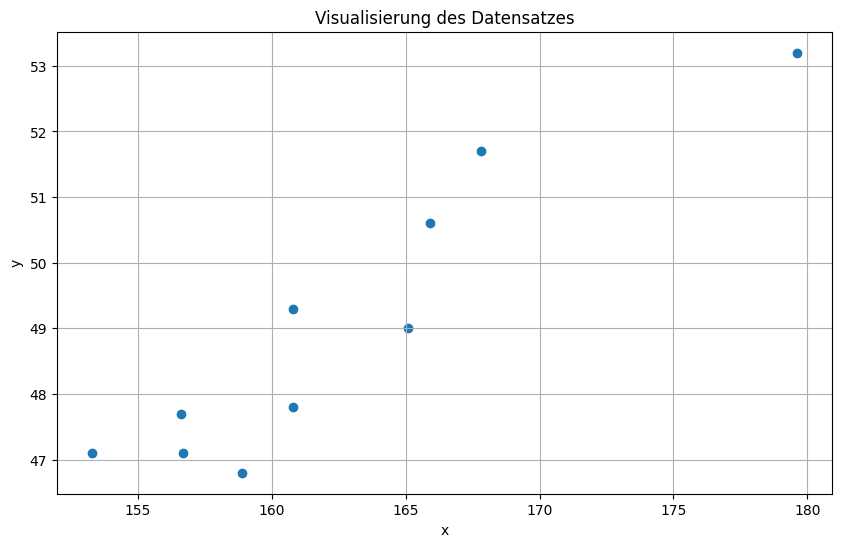

In [58]:
# Datensatz visualisieren
def visualise_datensatz(x,y):
    # Erstellen Sie das Diagramm
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    plt.title('Visualisierung des Datensatzes')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
visualise_datensatz(X,y)



### Das lineare Modell <a name="das_lineare_modell"></a>
Sei $θ = (θ_0 , θ_1 , ... , θ_n )^T ∈ R^{n+1}$. Ein lineares Modell auf $R^n$ ist eine Funktion $h_{\theta}(x)$ definiert als:
$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n$$
mit $ h_θ(x) = θ_0 + θ_1 x_1 + ... + θ_n x_n $ für alle $ x = (x_1 , ... , x_n)^T ∈ R^n $

Hier sind 3 mögliche lineare Modelle (unterschiedlicher Güte), die die Daten in Dring erklären: 
$$ f_1 (z) = 47 +  \frac{1}{100}z $$
$$ f_2 (z) = -4 +  \frac{1}{3}z $$
$$ f_3 (z) = 9 +  \frac{1}{4}z $$

Die Funktion $f_1$ kann äquivalent repräsentiert werden durch die Parameter $θ = (47, \frac{1}{100})$ eines linearen Modells $h_θ$.

In [61]:
def h(theta_0, theta_1,z): #hθ (x) = θ0 +θ1x1
    return theta_0 + theta_1*z

# Erzeugen Sie Werte für z
xpts = np.linspace(X.max(), X.min(), 1000)
#Funktionen der entsprechenden linearen Modelle aufgespannt auf den raum z
f1 = h(47,0.01,X)
f2 = h(-4,1/3,X)
f3 = h(9,0.25,X)  

Die folgende Abbildung visualisiert diese 3 verschiedene mögliche lineare Modelle:n

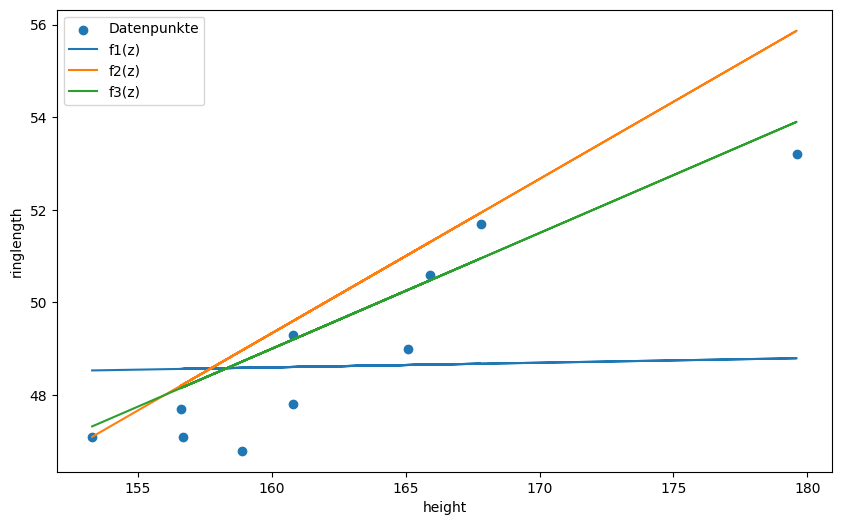

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Datenpunkte')
plt.plot(X, f1, label = "f1(z)")
plt.plot(X, f2, label = "f2(z)")
plt.plot(X, f3, label = "f3(z)")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.show()

In [39]:
def h_2(theta_0, theta_koef, x1, x2): #hθ (x) = θ0 +θ1x1 + +θ2x2
    return theta_0 + theta_koef[0]*x1 + theta_koef[1]*x2

### Quadratischer Fehler **L(D, f)** <a name="L"></a>

> **Definition 3.** Der quadratische Fehler $L(D,f)$
>
> Sei D ein Datensatz und $ f : \mathbb{R}^n → \mathbb{R} $ eine beliebige Funktion. 
Der quadratische Fehler L von f bzgl. D ist definiert durch
$$L(D, f) = \sum_{i=1}^m (f(x^{(i)})−y^{(i)})^2$$
Ist $f = h_θ$ eine lineare Funktion $$ hθ $$ mit Parametern θ, so ist dies äquivalent zu
$$L(D, f) = \lVert X_D θ - y_D \rVert ^2$$
wobei $\lVert . \rVert$ die Euklidische Norm ist.

Zurück zu den drei genannten linearen Modelle f1, f2 und f3: wir wenden den quadratischen Fehler auf diese Funktionen bzgl. des Datensatzes Dring an:

In [68]:
def L_berechnen(f_x, y):
    # Berechnet den quadratischen Fehler (MSE: Mean Squared Error)
    L = np.sum((f_x - y) ** 2)
    print(f"Der quadratische Fehler des Modells ist: {L}")
    return L
    
# Berechnen Sie den quadratischen Fehler für f1 und f2 und f3
L_f1 = L_berechnen(f1, y)
L_f2 = L_berechnen(f2, y)
L_f3 = L_berechnen(f3, y)

Der quadratische Fehler des Modells ist: 41.70476500000007
Der quadratische Fehler des Modells ist: 21.34888888888884
Der quadratische Fehler des Modells ist: 9.77812500000001


Wie man sieht erhalten wir die folgenden Werte
$$ L(Dring, f_1) \approx 41.705 $$
$$ L(Dring, f_2) \approx 21.349 $$
$$ L(Dring, f_3) \approx 9.778 $$
Wie man sieht erhält die optisch am besten angepasste Funktion $f_3$ den niedrigsten quadratischen Fehler **L**.


Damit $h_θ$ die Beispiele in $D$ bestmöglich approximiert, suchen wir Parameter $θ$, die den quadratischen Fehler $L$ bzgl. $D$ minimieren, d h., wir suchen eine Lösung für das folgende Optimierungsproblem:
$$min_θ L(D,θ) = min_θ \lVert X_D θ - y_D \rVert ^2 \tag{(1)}$$

Wir setzen unseren Beispiel fort und berechnen das optimale lineare Modell:

In [83]:
regr = LinearRegression().fit(X,y)
ypts_pred = regr.predict(xpts.reshape(-1,1))
#y_pred = regr.predict(X)

theta_0 = regr.intercept_[0] #konstante θ0 
theta_koef = regr.coef_[0][0] #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale trainierte Modell ist: h(x) = {theta_0} + {theta_koef}x ")

Das optimale trainierte Modell ist: h(x) = 5.3623451652386365 + 0.2686413708690333x 


In [86]:
foptimal = h(theta_0,theta_koef, X)
#und dessen quadratischen Fehler L
L_foptimal = L_berechnen(foptimal, y)
L_foptimal

Der quadratische Fehler des Modells ist: 5.910119951040408


5.910119951040408

Das optimale lineare Modell in diesem Beispiel ist gegeben durch
$$ f_{optimal}(z) \approx 5.362 + 0.269 x $$
Die Funktion foptimal verfügt mit $L(Dring, f) \approx 5.91$ über einen geringeren quadratischen Fehler als die Funktionen **f1, f2** und **f3** und ist visualisiert in der folgenden Abbildung:

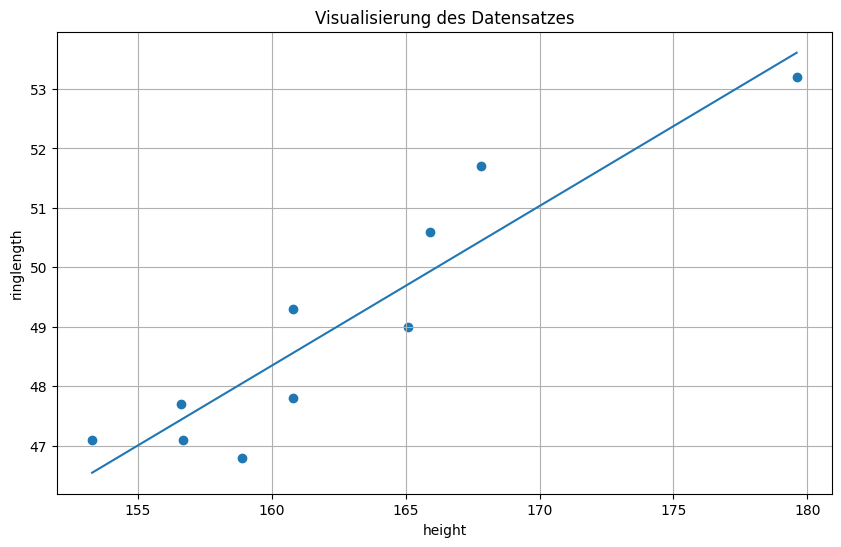

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(xpts, ypts_pred)
#plt.plot(X, y_pred, color = 'r')
plt.title('Visualisierung des Datensatzes')
plt.xlabel('height')
plt.ylabel('ringlength')
plt.grid(True)
plt.show()

## 2.1.2. Evaluation <a name="Evaluation"></a>
---
Die Evaluation hilft uns zu verstehen, wie gut eine bestimmte Methode ein spezifisches Problem löst --> und somit die beste Methode wählen.

**Verfahren:**
→ Aufteilung der Daten in:
- einen **Trainingsdatensatz**, der verwendet wird, um das Modell zu trainieren.
- und einen **Testdatensatz** der dazu dient, die Leistung des Modells auf neuen, zuvor ungesehenen Daten zu bewerten. Dies gibt uns eine Vorstellung davon, wie gut das Modell generalisiert.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr.fit(X_train,y_train)

LinearRegression()

Der Parameter `test_size=0.2` bedeutet, dass 20% der Daten für den Testdatensatz verwendet werden, während der Rest für den Trainingsdatensatz verwendet wird.
Alternativ, kann man auch bestimmte Zeilen spezifizieren, wie folgt:

```
# 2. und 9. Zeile, da die Indexierung bei 0 beginnt
Dtest = Dring.iloc[[1, 8]]
# Alle Zeilen außer der 2. und 9.
Dtrain = Dring.drop([1, 8])
```
dieses Datensatz enthält 10 zeilen, d.h. 2 zufällige Zeilen dieser Zeilen werden für den Testdatensatz verwendet.

Den **Evaluationsmaß**, den wir hier verwenden ist das **Bestimmtheitsmaß**, auch bekannt als **R<sup>2</sup>-Wert**
- Es ist eine normalisierte Variante des quadratischen Fehlers.
- gibt an, welcher Anteil der Varianz in den abhängigen Variablen durch das Modell erklärt wird.

Sei **D** = {(x<sup>(1)</sup>, y<sup>(1)</sup>),...,(x<sup>(m)</sup>, y<sup>(m)</sup>)} ein Datensatz und $$ f : R^n → R $$ eine beliebige Funktion. Das **Bestimmtheitsmaß R<sup>2</sup>-Wert** von f bzgl. D ist definiert durch
$$ R^2(D, f) = (1− \frac{L(D,f)}{\sum_{i=1}^m (y^{(i)}− \tilde{y})^2}) = (1− \frac{\sum_{i=1}^m (f(x^{(i)})− y^{(i)})^2}{\sum_{i=1}^m (y^{(i)}− \tilde{y})^2})$$

wobei der Mittelwert von y<sup>(i)</sup> ist:
$$ \tilde{y} = \frac{1}{m} \sum_{i=1}^m y^{(i)} $$

- Der Wert $R^2(D,f)$ kann maximal 1 betragen.
- Je kleiner der Wert $R^2(D,f)$, desto schlechter die Vorhersagequalität von f bezüglich D ist.
- **$R^2$-Wert = 1** $\longrightarrow$  das Modell erklärt die Daten perfekt, d.h. $f(x^i) = y^i$ 
- **$R^2$-Wert = 0** $\longrightarrow$ das Modell erklärt die Daten nicht besser als ein einfaches Modell, das nur den Durchschnitt der Daten verwendet D.h. ein naives Modell $f_{naive}$, dass stets den Mittelwert $\tilde{y}$ vorhersagen würde, hätten wir $R^2(D,f_{naive}) = 0$.

zur Veranschaulichung zeigen wir den **Bestimmtheitsmaß (R<sup>2</sup>-Wert)** für alle 3 vorherigen linearen Modelle **f<sub>1</sub>, f<sub>2</sub> und f<sub>3</sub>**, aber eigentlich ist nur das optimale lineare Modell **f<sub>optimal</sub>** hier relevant:

Wollen wir nun evaluieren, wie gut das optimale Modell generalisiert, können wir es auf die Testdaten anwenden
und vergleichen dazu die Vorhersagegenauigkeit des Modells **f<sub>optimal</sub>** mit den vorhandenen Werten.
Dazu nutzen wir das Bestimmtheitsmaß als Messgröße, d.h., wir berechnen:
$$ R^2(D_{test} , f_{optimal}) $$

In [96]:
regr.score(X,y)

0.8550103991130683

In [97]:
regr.score(X_train, y_train)

0.9185172981055556

In [98]:
regr.score(X_test, y_test)

0.6914887337784443

Der Wert 0.74 ist durchaus hoch, insbesondere bei dem recht kleinen Trainingsdatensatz, den wir genutzt haben. Vergleichen wir diesen Wert nun mit dem entsprechenden Wert auf den Trainingsdaten 0.91 so sehen wir, dass das Modell f1 weitaus besser auf dem Trainingsdatensatz abschneidet (auf dem es ja auch gelernt wurde). Der Abstand **R<sup>2</sup>(D<sub>test</sub>, f<sub>optimal</sub>)** zu **R<sup>2</sup> (D<sub>train</sub>, f<sub>optimal</sub>)** ist relativ groß und man könnte vermuten, dass das Modell **f<sub>optimal</sub>** zu stark an die Trainingsdaten angepasst ist und eher schlecht generalisiert (Überanpassung). Vermutlich haben wir hier aber nur Pech mit der Aufteilung in Trainings- und Testdaten gehabt.

Wir probieren eine andere Aufteilung:

In [100]:
# 8. und 9. Zeile, da die Indexierung bei 0 beginnt
Dtest = Dring.iloc[[7, 8]]
# Alle Zeilen außer der 8. und 9.
Dtrain = Dring.drop([7, 8])

Wir erhalten:
$$ R^2(D_{test2} , f_{optimal}) \approx 0.838 $$ 
$$ R^2(D_{train2} , f_{optimal}) \approx 0.863 $$ 
Hier sind beide Werte recht hoch und auch recht nah beieinander.

Dieses Problem der variierenden Abstände zwischen Bestimmtheit der Trainings- und Testdaten zu adressieren, benutzt man oft die sogenannte **Kreuzvalidierung (engl. cross validation)**.

- Die grundlegende Idee der Kreuzvalidierung besteht darin, die ursprünglichen Daten in ungefähr gleichgroße zwei Teile zu teilen: einen Trainingsdatensatz und einen Validierungsdatensatz. Das Modell wird auf dem Trainingsdatensatz trainiert und dann auf dem Validierungsdatensatz getestet. Dieser Prozess wird mehrmals wiederholt, wobei verschiedene Teile der Daten als Trainings- und Validierungsdatensatz verwendet werden. Am Ende wird der Durchschnitt der Modellleistung über alle Durchläufe berechnet.


> Gegeben ist ein Datensatz **D** und **k** eine natürliche Zahl (übliche Werte sind 5 oder 10), so teilen wir zunächst **D** in **k** ungefähr gleich große Teildatensätze **D<sub>1</sub>,..., D<sub>k</sub>** auf (auch bekannt als “Folds”). Anschliessend führen wir eine Evaluation auf **k** verschiedenen Paaren von Trainings- und Testdaten **(D<sub>train_1</sub>, D<sub>test_1</sub>),...,(D<sub>train_k</sub>, D<sub>test_k</sub>)** aus. D.h. das Modell wird **k** Mal trainiert und getestet, wobei in jeder Runde eine andere Teilmenge als Testdatensatz und der Rest als Trainingsdatensatz verwendet wird.

> Die Leistung des Modells wird dann als Durchschnitt der Leistung in jeder Runde berechnet. Dies hilft dabei, eine Überanpassung zu vermeiden und gibt ein besseres Verständnis dafür, wie das Modell auf neue, unbekannte Daten reagieren würde.


**<ins>Wichtig</ins>**: Es ist wichtig zu beachten, dass eine größere Anzahl von Folds zu besseren Schätzungen der Modellleistung führen kann, aber auch die Rechenzeit erhöht.

Wir umschreiben die Funktion `R2Wert_berechnen(a,b)` wie folgt:

In [101]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=3) #array([0.75468997, 0.74975476, 0.77382931])
print(scores)
scores.mean() 

[0.75468997 0.74975476 0.77382931]


0.7594246779223471

## 2.1.3. Nichtlineare Modelle <a name="nl_modelle"></a>
---
Lineare Regression ist eine mächtige Methode, aber fundamental durch die Linearitätsannahme in ihrer Anwendbarkeit eingeschränkt. Merkmale und Zielvariable sind nicht immere in einem linearen Zusammenhang

**Beipiel**:
Der folgende Datensatz **D<sub>houses</sub>**, setzt 
die Gö¨ße eines Hauses zu seinem Kaufpreis in Relatio). P$$reis}
\end{table}
.

Wie man sieht, ist eine Anpassung an die Daten nur sehr schlecht möglich, da diese offensichtlich nicht in einem linearen Zusammenhang zueinander stehen.
Die Einbeziehung nichtlinearer Zusammenhänge zwischen Merkmalen und der Zielvariablen kann bei der linearen Regression realisiert werden, indem in einem Vorbereitungsschritt die  Beispiele um zusätzliche (nichtlineare) Merkmale ergänzt werden, die aus den schon existierenden Merkmalen berechnet werden.

**-->** Wir erweiterten aus diesem Grund den Datensatz **D<sub>houses</sub>** um ein weiteres Merkmal, dass das Quadrat des Merkmals ”Fläche“ ist, d. h. bei jedes Beispiel des Datensatzes mit Merkmalsausprägung **x** des Merkmals ”Fläche“ erhält ein weiteres Merkmal ”Fläche<sup>2</sup>" mit Ausprägung **x<sup>2</sup>**.ung x2

Wir versuchen das gleiche nochmal und einen linearen Modell **f** finden, das an die Daten angepasst ist (hier wurde der gesamte Datensatz **D<sub>houses</sub>** als Trainingsdatensatz benutzt).

Wir erhalten die folgende lineare Funktion:
$$ f_{houses}(x_1, x_2) \approx 647307.78 + −7297.676x_1 + 34.189x_2 $$
Da **x<sub>2</sub> = x<sub>1</sub><sup>2</sup>**
für jedes Beispiel ist, können wir **f<sub>houses</sub>** auch vereinfacht darstellen durch:
$$ f_{houses}(x_1) \approx 647307.78 + −7297.676x_1 + 34.189x_1^2 $$
und somit ist f auch keine lineare Funktion mehr, sondern ein **<ins>Polynom</ins>**.

Der erweiterte Datensatz **D<sub>houses</sub>** ist also eine polynomielle Merkmalserweiterung für den **Maximalgrad 2**.

![image.png](attachment:eaaba776-f3e9-4757-92a0-81161bc7e3d6.png)

## 2.1.4. Über- und Unteranpassung <a name="u_u_anpassung"></a>

Die Wahl des richtigen Modells ist entscheidend beim maschinellen Lernen, deshalb stellt sich die Frage:

**Warum nimmt man statt eines linearen Modells nicht direkt ein maximal komplexes Modell , das damit auch beliebig genau an den Trainingsdatensatz angepasst werden kann?**

Es gibt mehrere Gründe:
* Zuna¨chst ergeben sich dadurch **ressourcenspezifische Probleme**, da das Lernen unter Umständen signifikant mehr Zeit benötigt.
* **Überanpassung** (engl. overfitting), tritt auf, wenn ein Modell die Trainingsdaten zu gut lernt und dabei auch das Rauschen in den Daten erfasst. Dies führt dazu, dass das Modell auf den Trainingsdaten sehr gut, aber auf den Testdaten schlecht abschneidet. d. h., das gelernte Modell ist aufgrund seiner Komplexität so stark an die Trainingsdaten angepasst, dass es nicht mehr gut auf ungesehene Daten generalisiert.
* **Unteranpassung** (engl. Underfitting) tritt auf, wenn ein Modell nicht genügend Muster aus den Daten lernt. Dies führt dazu, dass das Modell sowohl auf den Trainingsdaten als auch auf den Testdaten schlecht abschneidet. In anderen Worten: ein zu einfaches, nicht-ausdrucksstarkes Modell kann sowohl die Trainings- als auch die Testdaten nicht ausreichend gut modellieren, was zu schlechten Vorhersagen führt.

<ins>Wichtig für die Entwicklung eines adäquaten Modells für eine bestimmte überwachte Lernaufgabe</ins> **-->** Unter- und Überanpassung erkennen und das richtige Gleichgewicht zwischen diesen beiden Aspekten zu finden.

Das folgende ist ein Datensatz **D_Stern**.

In [117]:
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("./dataset/sl_linreg_ex_fitting.csv")

X = df["x"].to_numpy().reshape(-1, 1)
y = df["y"].to_numpy().reshape(-1, 1)
df

,x,y
0,1,17
1,2,27
2,3,43
3,4,73
4,5,80
5,6,82
6,7,95
7,8,92
8,9,99
9,10,104


In [118]:
df_test = pd.read_csv("./dataset/sl_linreg_ex_fitting_test.csv")

X_test = df_test["x"].to_numpy().reshape(-1, 1)
y_test = df_test["y"].to_numpy().reshape(-1, 1)
df_test

,x,y
0,2.2,45
1,3.0,55
2,4.5,75
3,7.2,97
4,8.3,104
5,9.2,106


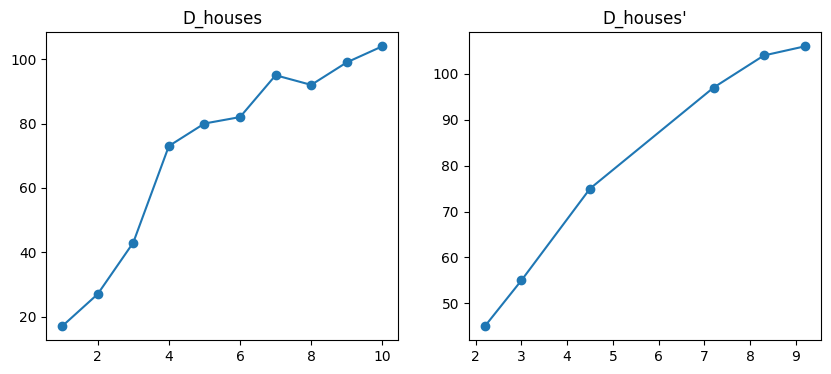

In [126]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Erstellen Sie den ersten Plot
axs[0].scatter(X,y)
axs[0].plot(X,y)
axs[0].set_title('D_houses')

# Erstellen Sie den zweiten Plot
axs[1].scatter(X_test, y_test)
axs[1].plot(X_test, y_test)
axs[1].set_title('D_houses\'')

# Anzeigen der Plots
plt.show()


In [131]:
regr_exp =  LinearRegression().fit(X,y)
y_exp_pred = regr_exp.predict(X)
#y_pred = regr.predict(X)

theta_0 = regr_exp.intercept_[0] #konstante θ0 
theta_koef = regr_exp.coef_[0] #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale trainierte Modell ist: h(x) = {theta_0} + {theta_koef}x ")

Das optimale trainierte Modell ist: h(x) = 17.866666666666674 + [9.6969697]x 


Die Modelle, die auf diesem Datensatz erstellt werden, sind lineare Modelle und deren polynomielle Erweiterungen bis zum Grad 9. Das bedeutet, dass wir beginnen, indem wir ein einfaches lineares Modell erstellen **(d = 1)**, das nur eine unabhängige Variable oder ein Merkmal (x) verwendet. Dann fügen wir sukzessive höhere Potenzen von x hinzu, um komplexere Modelle zu erstellen. Das komplexeste Modell in diesem Fall ist das Modell für d = 9, das eine Funktion der Form:
$$ f_9(x) = θ_0 + θ_1x + θ_2x^2 + ... + θ_9x^9 $$
verwendet. 

Die Komplexität der Modelle nimmt mit der Hinzunahme von Termen höherer Grade zu. <ins>Einfachere Modelle (wie das Modell für d = 1) neigen dazu, unterangepasst zu sein</ins>, was bedeutet, dass sie die Trainingsdaten nicht gut genug modellieren können. Auf der anderen Seite <ins>neigen komplexere Modelle (wie das Modell für d = 9) dazu, überangepasst zu sein</ins>, was bedeutet, dass sie die Trainingsdaten zu gut modellieren und dabei möglicherweise das Rauschen in den Daten erfassen, was zu schlechter Leistung auf neuen, unbekannten Daten führt.

In [110]:

poly = PolynomialFeatures(9)
X_ext = poly.fit_transform(X)
X_ext_test = poly.transform(X_test)

poly_regr = LinearRegression().fit(X_ext,y)
poly_regr.score(X_ext,y)

0.9999999999999843

```python
'''
Dies erstellt ein PolynomialFeatures-Objekt mit einem Grad von 9. Dieses Objekt wird verwendet, um die Merkmale zu transformieren, indem es zusätzliche polynomiale Merkmale hinzufügt.

X_ext = poly.fit_transform(X): Dies passt das PolynomialFeatures-Objekt an die Daten X und X_test an und transformiert X und X_test dann in ein erweitertes Merkmalset X_ext, das zusätzliche polynomiale Merkmale enthält.
'''
```

In [137]:
poly_regr.score(X_ext_test,y_test)

0.7886373601418082

In [130]:
theta_0 = poly_regr.intercept_[0] #konstante θ0 
theta_koef = poly_regr.coef_[0]#(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale trainierte Modell ist: h(x) = {theta_0} + x{theta_koef} ")

Das optimale trainierte Modell ist: h(x) = -128.99909682299477 + x[ 0.00000000e+00  2.00505855e+02  5.46891011e+01 -2.13437797e+02
  1.42915638e+02 -4.62096631e+01  8.35105716e+00 -8.61459616e-01
  4.74454958e-02 -1.08300382e-03] 


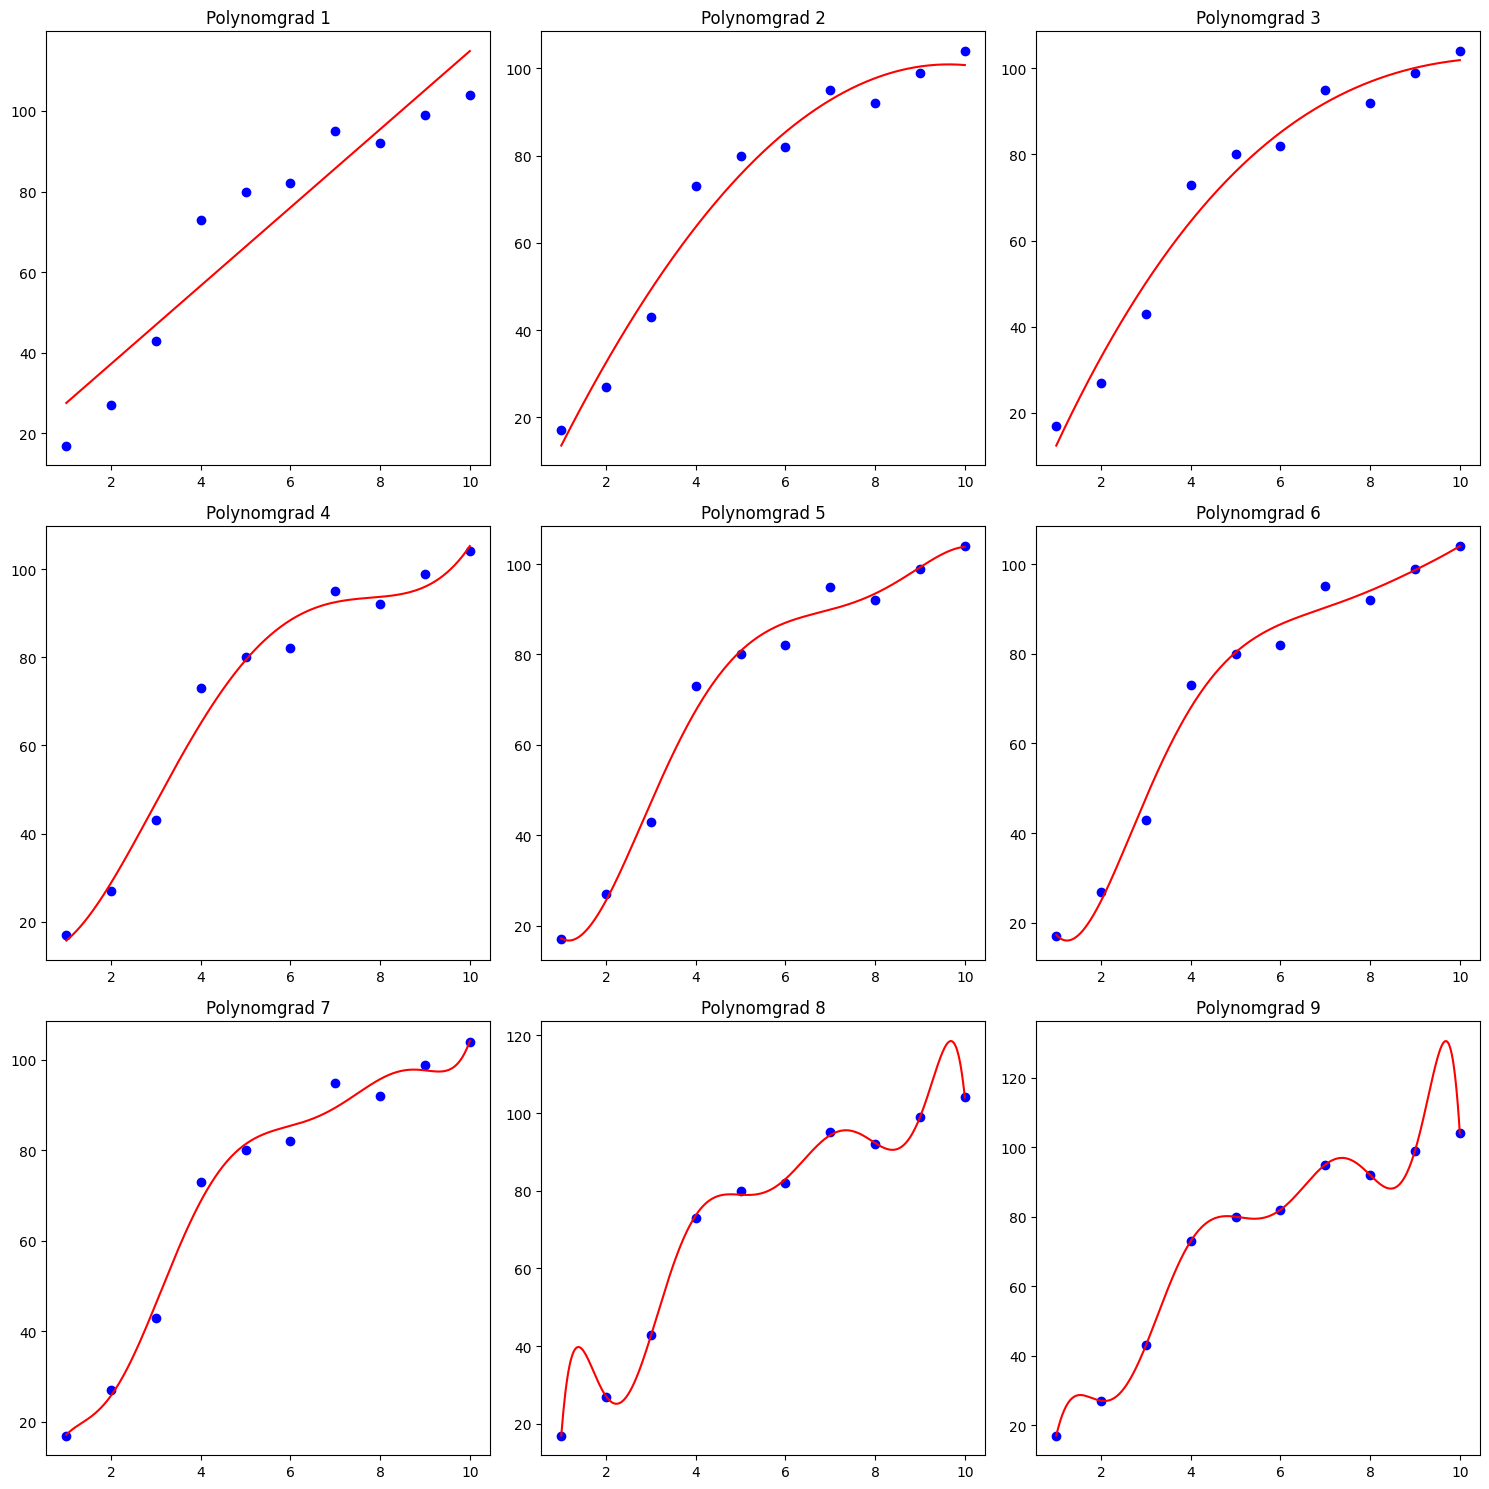

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Erstellen Sie eine Reihe von x-Werten für die Plots
x_values = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(1, 10):
    # Erstellen Sie ein PolynomialFeatures-Objekt für den aktuellen Grad
    poly = PolynomialFeatures(i)
    
    # Transformieren Sie die x-Werte
    X_ext = poly.fit_transform(X)
    x_values_ext = poly.transform(x_values)
    
    # Trainieren Sie das Modell
    poly_regr = LinearRegression().fit(X_ext, y)
    
    # Berechnen Sie die y-Werte für das aktuelle Polynom
    y_values = poly_regr.predict(x_values_ext)
    
    # Erstellen Sie einen Plot für das aktuelle Polynom
    ax = axs[(i - 1) // 3, (i - 1) % 3]
    ax.scatter(X, y, color='blue')
    ax.plot(x_values, y_values, color='red')
    ax.set_title(f'Polynomgrad {i}')

plt.tight_layout()
plt.show()


Die Modelle für **d = 2** und **d = 3** scheinen in diesem Fall am besten zu sein, da sie ein gutes Gleichgewicht zwischen Unteranpassung und Überanpassung bieten. Sie modellieren die Trainingsdaten nicht perfekt, aber sie sind wahrscheinlich robuster gegenüber Störungen in den Daten und liefern bessere Vorhersagen auf neuen, unbekannten Daten.

### Die Verzerrung-Varianz-Dilemma <a name="v_v_dilemma"></a>
Das Problem der Abwägung von Über- und Unteranpassung wird auch die **Verzerrung-Varianz-Dilemma** genannt. Hierbei sind zwei Konzepte wichtig:

- **Verzerrungsfehler (Bias Error)**: Dieser Fehler entsteht, wenn ein Modell zu einfache Annahmen über die Datenstruktur trifft. Ein Modell mit hohem Bias neigt dazu, die Daten zu "unterschätzen", was bedeutet, dass es die Komplexität der Daten nicht vollständig erfasst. Dies führt zu einer schlechten Leistung sowohl auf den Trainings- als auch auf den Testdaten, ein Phänomen, das als "Unteranpassung" (Underfitting) bezeichnet wird.

- **Varianzfehler (Variance Error)**: Dieser Fehler entsteht, wenn ein Modell zu komplexe Annahmen über die Datenstruktur trifft. Ein Modell mit hoher Varianz "überinterpretiert" die Daten, indem es auch das Rauschen oder die zufälligen Schwankungen in den Trainingsdaten lernt. Dies führt zu einer guten Leistung auf den Trainingsdaten, aber zu einer schlechten Leistung auf den Testdaten, ein Phänomen, das als "Überanpassung" (Overfitting) bezeichnet wird.

Das Ziel ist es, ein Gleichgewicht zwischen **Verzerrung** und **Varianz** zu finden, um ein Modell zu erhalten, das weder unterangepasst noch überangepasst ist. Es hilft, die Verläufe der Kostenfunktionswerte (oder des Bestimmtheitsmaßes) bei Trainings- und Testdaten mit steigender Modellkomplexität zu betrachten.

**Bei Trainingsdaten:**
- nimmt die Bestimmtheit eines Modells mit steigender Komplexität auf den Trainingsdaten zu.
- **Das bedeutet -->** je ausdrucksstärker das Modell ist (d.h., je mehr es in der Lage ist, komplexe Muster in den Daten zu erfassen), desto besser wird es an die Trainingsdaten angepasst.

**Bei Testdaten** ist der Verlauf etwas komplexer:
- Weil ein komplexeres Modell in der Lage ist, die zugrunde liegenden Muster in den Daten besser zu erfassen, nimmt die Bestimmtheit zunächst zu: solange das Modell unteranpasst ist, können weder Trainings- noch Testdaten gut modelliert werden, aber je näher man an das ”korrekte“ Modell kommt, desto besser werden insbesondere auch die Vorhersagen auf den Testdaten.
- Steigt die Modellkomplexität aber weiter, kann das Modell beginnen, das Rauschen in den Trainingsdaten zu lernen, so wird das Modell überangepasst und die Vorhersagequalität auf den Testdaten sinkt wieder.


#### Aber was ist den die optimale Modellkomplexität?

Im Grunde liegt die optimale Modellkomplexität <ins>am Scheitelpunkt der Kurve der Testdaten.</ins> An diesem Punkt ist die Bestimmtheit (ein Maß für die Anpassungsgüte des Modells) sowohl bei den Trainings- als auch bei den Testdaten relativ hoch, was darauf hindeutet, dass das Modell gut auf neue, unbekannte Daten generalisiert.

>Modelle, deren Komplexität links von diesem Punkt liegt, sind unterangepasst.

>Modelle, die rechts von diesem Punkt liegen, überangepasst.



Es ist wichtig zu beachten, dass die optimale Modellkomplexität von Datensatz zu Datensatz variieren kann und dass verschiedene Techniken wie Kreuzvalidierung und Regularisierung verwendet werden können, um das Verzerrung-Varianz-Dilemma zu bewältigen.

## 2.1.5 Regularisierung <a name="regularisierung"></a>
Regularisierung ist eine Technik, die verwendet wird, um das Verzerrung-Varianz-Dilemma zu lösen bzw. um Überanpassung zu verhindern, indem eine Strafterm zur Verlustfunktion hinzugefügt wird, die das Modell optimiert.

Im Grunde, fügt sie einen Strafterm zur Kostenfunktion hinzu, um die Komplexität des Modells zu begrenzen und somit Overfitting zu verhindern. 

Es gibt verschiedene Arten von Regularisierungstechniken wie z.B.:
- L1-Regularisierung (Lasso),
- L2-Regularisierung (Ridge)
- und Elastic Net, die eine Kombination aus L1 und L2 ist.


#### Die regularisierte Kostenfunktion

Die mit *R* und *λ* regularisierte Kostenfunktion ist $$L_{R,λ} (D, f) = L(D, f) + λR(f)$$

**L(D, f)** ist die ursprüngliche Kostenfunktion mit $$f : \mathbb{R}^n \rightarrow \mathbb{R}$$

Es besteht aus zwei Teilen:
- **dem ursprünglichen Verlust L(D,f)**: misst, wie gut das Modell die Trainingsdaten anpasst.
- **dem Regularisierungsterm λR(f)**: verhindert, dass das Modell zu komplex wird und overfittet.

Die Funktion **R(f)** ist der **Regularisierer**, misst die Komplexität des Modells f, dabei bestimmt der **Regularisierungsparameter λ** das Ausmaß der Regularisierung. Für **λ** gilt: $$\lambda ∈ \mathbb{R}$$ und $$\lambda > 0$$.

Ein höherer Wert von **Der Regularisierungsparameter λ** bedeutet mehr Regularisierung und ein einfacheres Modell, während ein niedrigerer Wert von **λ** weniger Regularisierung und ein komplexeres Modell bedeutet. Es ist wichtig, den richtigen Wert von **λ** zu wählen, um Overfitting zu vermeiden und gleichzeitig eine gute Anpassung an die Trainingsdaten zu gewährleisten. Dies kann durch Techniken wie Kreuzvalidierung erreicht werden.

#### Ridge-Regression
Die lineare Regression mit Kostenfunktion **L<sub>T</sub>** nennt man allgemein auch **Ridge-Regression** (engl. ridge regression). 
Die regularisierte Kostenfunktion
$$L_T(D,\theta) = \lVert X D\theta - y D\rVert ^2 + \lambda \sum_{i=1}^{n} \theta_i^2 $$
besteht aus der Kostenfunktion $$ L(D,θ)=∥XDθ−yD∥^2 $$ und dem **Tikhonov-Regularisierer** $$ R_T​(θ_1​, … ,θ_n​) = \sum_{i=1}^{n} \theta_i^2 $$ der **Tikhonov-Regularisierer** ist eine Technik zur Vermeidung von Überanpassung, indem es eine Strafe für große Werte der Parameter **θ<sub>i</sub>** eingeführt wird.

Der Parameter **λ** bestimmt, wie stark die Regularisierung ist. Ein größerer Wert von **λ** führt zu stärkerer Regularisierung.

>**Das Finden 
eines geeignetes Wertes von λ ist hier also die Kernaufgab**e

In [ ]:
from sklearn.linear_model import Ridge


ridge_regr = Ridge(alpha=0.2).fit(X_train_poly,y_train)
ridge_regr.score(X_train_poly,y_train)

In [ ]:
ridge_regr.score(X_test_poly,y_test)

## 2.2.6. Zusammenfassung <a name="zusammenfassung"></a>

Um einen logistischen Regressionsmodell zu kalkulieren, folgen wir die folgenden Schritte:
1. **Daten vorbereiten**: Der erste Schritt besteht darin, Ihre Daten für das Modell vorzubereiten. Dies kann das Laden der Daten, das Aufteilen in Trainings- und Testsets, das Skalieren der Daten und das Behandeln von fehlenden Werten umfassen.

2. **Modell erstellen**: Erstellen Sie ein Instanz des `LinearRegression` Modells aus der `sklearn.linear_model` Bibliothek.

3. **Modell trainieren**: Verwenden Sie die `fit` Methode des Modells, um es auf Ihren Trainingsdaten zu trainieren. Sie müssen die Merkmale (Eingaben) und die Zielvariable (Ausgabe) als Argumente übergeben.

4. **Vorhersagen treffen**: Nachdem das Modell trainiert wurde, können Sie die `predict` Methode verwenden, um Vorhersagen auf neuen Daten zu treffen.

5. **Modell bewerten**: Verwenden Sie geeignete Metriken (wie Genauigkeit, Präzision, Recall usw.) um die Leistung Ihres Modells zu bewerten. In `sklearn` können Sie Funktionen wie `mean_squared_error`, `r2_score` usw. aus dem `sklearn.metrics` Modul verwenden.

6. **Modell optimieren**: Optional können Sie Feature Selection oder Regularisierungstechniken anwenden, um die Leistung Ihres Modells zu verbessern.

## 2.2.7. Fragen <a name="fragen"></a>

>1. Zur Evaluation des optimal angepassten linearen Modells benutzt man üblicherweise das Bestimmtheitsmaß, das bzgl. einer Funktion $f$ und einem Datensatz $D$ allgemein definiert ist als $$R^2(D, f) = (1− \frac{L(D,f)}{\sum_{i=1}^m (y^{(i)}− \tilde{y})^2}) = (1− \frac{\sum_{i=1}^m (f(x^{(i)})− y^{(i)})^2}{\sum_{i=1}^m (y^{(i)}− \tilde{y})^2})$$
>
>- [x] Wahr
>- [ ] Falsch

Um eine Methode des maschinellen Lernens zu evaluieren, teilt man u¨blicherweise die fu¨r das Lernen zur Verfu¨gung stehenden Daten in einen Trainingsdatensatz (wie zuvor schon genutzt) und einen Testdatensatz auf. Anschließend trainiert man die Methode ausschließlich auf dem Trainingsdatensatz und benutzt den Testdatensatz, um zu evaluieren
wie gut das gelernte Modell auf zuvor ungesehenen Daten generalisiert.

Als Evaluationsmaß benutzen wir eine normalisierte Variante des quadratischen Fehlers: das Bestimmtheitsmaß $R^2$-Wert.

>2. Ein lineares Modell $h_θ$
 kann auch mit analytischen Methoden bestimmt werden
>
>- [x] Wahr
>- [ ] Falsch

Lineare Regression ist nur eine Methode von vielen im Bereich des maschinellen Lernens. Eine wichtiger Punkt bei der Entwicklung und Anwendung von Methoden des maschinellen Lernens ist daher die **Evaluation**, d. h., die **Analyse** und Feststellung, wie gut eine bestimmte Methode ein konkretes Problem des maschinellen Lernens lo¨st..

>3. Eine Überanpassung eines Modells $f$ an einen Datensatz $D^{train}$ liegt vor, wenn $R^2(D^{train})$ relativ niedrig und der Abstand von $R^2(D^{train})$ zu $R^2(D^{test})$ relativ klein ist.
>
>- [x] Wahr
>- [ ] Falsch

Überanpassung, auch bekannt als Overfitting, tritt auf, wenn ein Modell zu gut an die Trainingsdaten $D_{\text{train}}$ angepasst ist und daher schlecht auf neue, unbekannte Daten (wie die Testdaten $D_{\text{test}}$) generalisiert. 

Typischerweise ist bei Überanpassung der Wert von $R^2(D_{\text{train}})$ (der Bestimmtheitsmaß für die Trainingsdaten) relativ hoch, da das Modell die Trainingsdaten sehr gut erfasst. Gleichzeitig ist der Abstand zwischen $R^2(D_{\text{train}})$ und $R^2(D_{\text{test}})$ (dem Bestimmtheitsmaß für die Testdaten) groß, da das Modell auf den Testdaten schlecht abschneidet.

>4. Numerische Methoden zur Bestimmung von linearen Modellen sind insbesondere bei einer großen Anzahl von Merkmalen und einer großen Anzahl von Beispielen performanter.
>
>- [x] Wahr
>- [ ] Falsch

Gerade bei großen Werten für $m$ und $
$n ist die Verwendung von numerische  Optimierungsmethoden (wie Gradient Descent) zu bevorzugen.